In [26]:
import sys
import os

%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as sig

current_dir = os.getcwd()
information_metrics_dir = os.path.dirname(current_dir)
sys.path.append(information_metrics_dir)

import spatial_metrics.helper_functions as hf
import spatial_metrics.detect_peaks as dp
import spatial_metrics.cell_model_base as cs_model


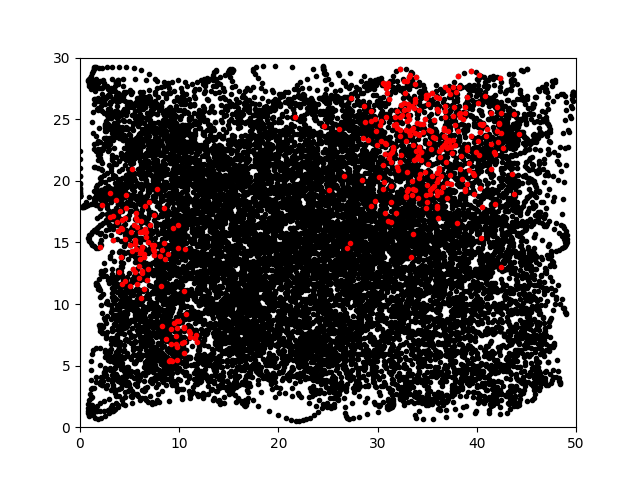

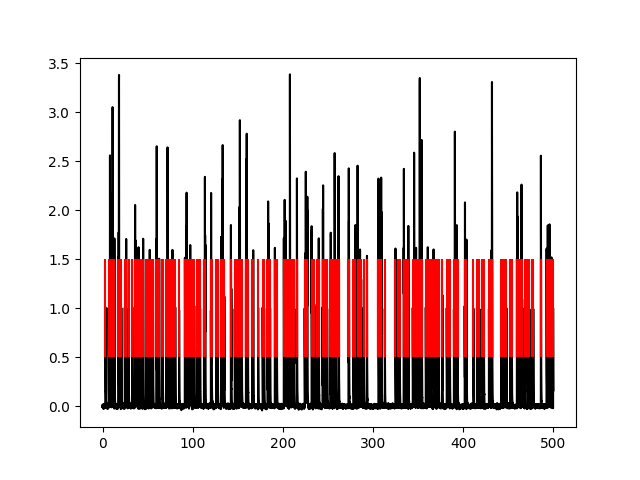

In [28]:

# Cell simulation parameters
sampling_rate = 30. # points/frames per second
duration = 500 # in seconds
rate = 10 # how much your neuron should spike
environment_edges = [[0,50],[0,30]] # in cm [[x_min,x_max],[y_min,y_max]]
smooth_time = 0.1
rho1 = 0.02
sigma = 1
mu_e = 0.

# Define field parameters
num_of_fields = 3

field1_center = (5, 15)
field2_center = (10, 7)
field3_center = (35, 25)
field1_size = 2
field2_size = 1
field3_size = 4

x_coordinates,y_coordinates,speed,speed_smoothed,time_vector = cs_model.generate_random_walk(input_srate = sampling_rate,input_total_Time = duration,heading_srate = 10., speed_srate = 5., rho1  = rho1,sigma = sigma,mu_e  = mu_e, smooth_points = int(np.round(smooth_time*sampling_rate)),environment_edges = environment_edges)
total_points = time_vector.shape[0]

spike_times = cs_model.generate_poisson_spikes(rate, duration)
spike_times_idx = (spike_times*sampling_rate).astype(int)

if num_of_fields == 0:
    modulated_spike_times_idx = spike_times_idx.copy()
else:
    modulated_spike_times_idx = []
    for counter in range(num_of_fields):
        field_center = eval('field' + str(counter+1) + '_center')
        field_size = eval('field' + str(counter+1) + '_size')
        modulated_spike_times_idx_aux = cs_model.digitize_spiketimes(x_coordinates,y_coordinates,spike_times_idx,x_center = field_center[0],y_center = field_center[1], s = field_size)
    
        modulated_spike_times_idx.append(modulated_spike_times_idx_aux)
    modulated_spike_times_idx = np.unique(np.concatenate(modulated_spike_times_idx)).astype(int)
    
signal,time_vector = cs_model.generate_calcium_signal(modulated_spike_times_idx,total_points,sampling_rate,noise_level = 0.01, b = 5.)
peaks_idx = dp.detect_peaks(signal,mpd=0.5*sampling_rate,mph=1.*np.nanstd(signal))


plt.close('all')
plt.figure()
plt.plot(x_coordinates, y_coordinates,'k.')
if len(modulated_spike_times_idx) > 0:
    plt.plot(x_coordinates[modulated_spike_times_idx],y_coordinates[modulated_spike_times_idx],color = 'red',linestyle='',marker='.',markersize=6)
plt.xlim([environment_edges[0][0],environment_edges[0][1]])
plt.ylim([environment_edges[1][0],environment_edges[1][1]])
# plt.gca().set_aspect('equal', 'box')
plt.show()

plt.figure()
plt.plot(time_vector, signal,'k')
if len(modulated_spike_times_idx) > 0:
    plt.eventplot(time_vector[modulated_spike_times_idx],color='red')
plt.show()


In [35]:
saving_dict = dict()
saving_dict['signal'] = signal
saving_dict['time_vector'] = time_vector
saving_dict['x_coordinates'] = x_coordinates
saving_dict['y_coordinates'] = y_coordinates
saving_dict['spike_times'] = modulated_spike_times_idx
saving_dict['environment_edges'] = environment_edges
saving_dict['sampling_rate'] = sampling_rate

np.save('simulated_signal.npy',saving_dict)



In [33]:
# Load data
# output_dict = np.load('simulated_signal.npy',allow_pickle=True).item()
# signal = output_dict['signal']
# time_vector = output_dict['time_vector']
# x_coordinates = output_dict['x_coordinates']
# y_coordinates = output_dict['y_coordinates']
# modulated_spike_times_idx = output_dict['spike_times']
# environment_edges = output_dict['environment_edges']
# sampling_rate = output_dict['sampling_rate']
